In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load the dataset
file_path = "world_population.csv"
df = pd.read_csv(file_path)

# Display the first few rows and column info
df_head = df.head()
df_info = df.info()

df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


<ipython-input-3-2b816b7f280b>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Continent', y='2022 Population', estimator=sum, ci=None)


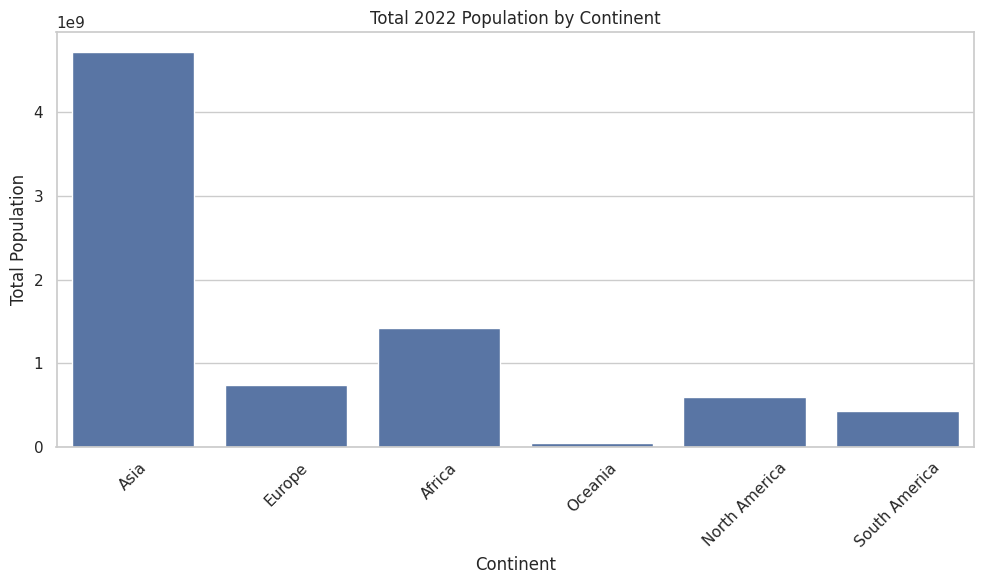

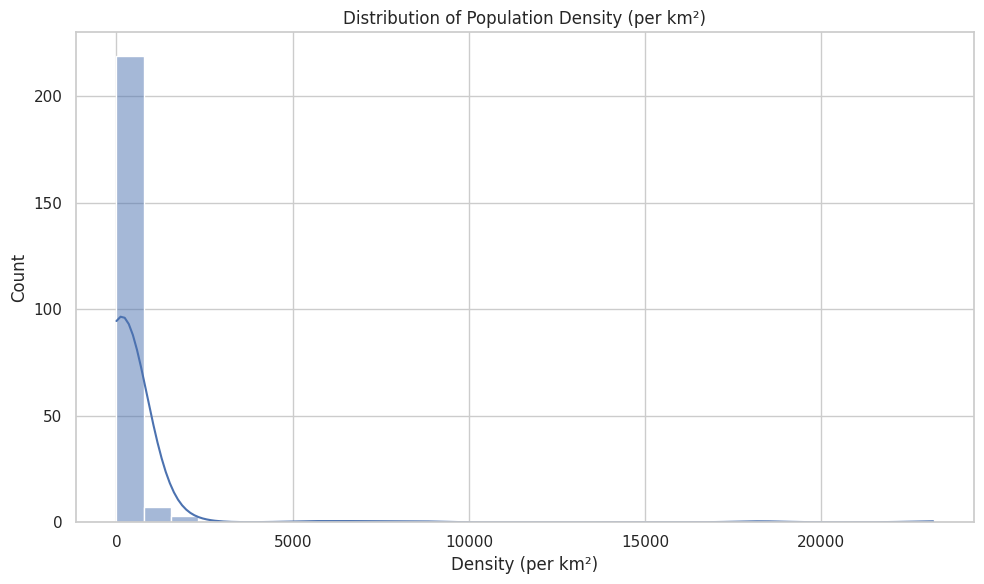

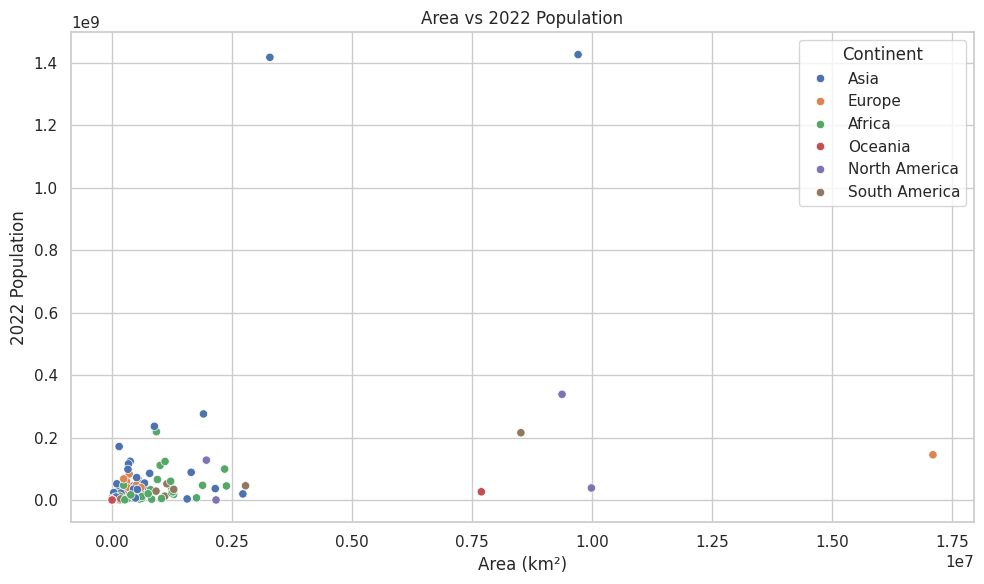

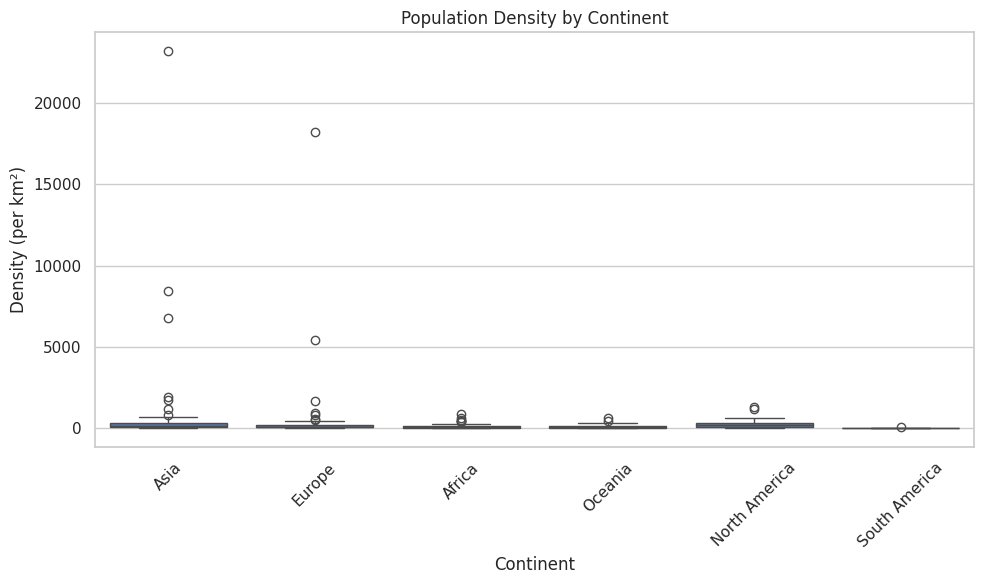

In [ ]:


# Set the style
sns.set(style="whitegrid")

# Step 2: Diagrammatic and Graphical Representation

# Bar plot: Population by Continent
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Continent', y='2022 Population', estimator=sum, ci=None)
plt.title('Total 2022 Population by Continent')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram: Distribution of Population Density
plt.figure(figsize=(10, 6))
sns.histplot(df['Density (per km²)'], bins=30, kde=True)
plt.title('Distribution of Population Density (per km²)')
plt.xlabel('Density (per km²)')
plt.tight_layout()
plt.show()

# Scatter plot: Area vs Population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area (km²)', y='2022 Population', hue='Continent')
plt.title('Area vs 2022 Population')
plt.xlabel('Area (km²)')
plt.ylabel('2022 Population')
plt.tight_layout()
plt.show()

# Box plot: Population Density by Continent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Continent', y='Density (per km²)')
plt.title('Population Density by Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats
import numpy as np

# Selecting numerical columns for analysis
num_cols = ['2022 Population', 'Area (km²)', 'Density (per km²)',
            'Growth Rate', 'World Population Percentage']

# Recalculate descriptive statistics with manual MAD (Mean Absolute Deviation)
summary_stats_fixed = {}

for col in num_cols:
    data = df[col]
    summary_stats_fixed[col] = {
        "Mean": data.mean(),
        "Median": data.median(),
        "Mode": data.mode().iloc[0] if not data.mode().empty else np.nan,
        "Range": data.max() - data.min(),
        "Q1": data.quantile(0.25),
        "Q3": data.quantile(0.75),
        "Variance": data.var(),
        "Standard Deviation": data.std(),
        "Standard Error": stats.sem(data),
        "Mean Deviation": np.mean(np.abs(data - data.mean())),  # Fixed here
        "Coefficient of Variation": data.std() / data.mean() if data.mean() != 0 else np.nan,
        "10th Percentile": data.quantile(0.10),
        "90th Percentile": data.quantile(0.90),
        "Skewness": data.skew(),
        "Kurtosis": data.kurt()
    }

# Convert to DataFrame
summary_df_fixed = pd.DataFrame(summary_stats_fixed).T.round(3)
summary_df_fixed


,Mean,Median,Mode,Range,Q1,Q3,Variance,Standard Deviation,Standard Error,Mean Deviation,Coefficient of Variation,10th Percentile,90th Percentile,Skewness,Kurtosis
2022 Population,3.407441e+07,5559944.500,510.000,1.425887e+09,419738.500,2.247650e+07,1.870505e+16,1.367664e+08,8940700.883,4.455599e+07,4.014,48225.200,5.963696e+07,9.151,90.465
Area (km²),5.814494e+05,81199.500,21.000,1.709824e+07,2650.000,4.304258e+05,3.104083e+12,1.761841e+06,115175.140,7.614925e+05,3.030,247.400,1.234446e+06,6.082,43.501
Density (per km²),4.521270e+02,95.347,0.026,2.317224e+04,38.418,2.389330e+02,4.268860e+06,2.066122e+03,135.067,5.917620e+02,4.570,15.837,5.228230e+02,8.949,87.033
Growth Rate,1.010000e+00,1.008,1.004,1.570000e-01,1.002,1.017000e+00,0.000000e+00,1.300000e-02,0.001,1.000000e-02,0.013,0.996,1.026000e+00,-1.102,12.495
World Population Percentage,4.270000e-01,0.070,0.000,1.788000e+01,0.010,2.800000e-01,2.941000e+00,1.715000e+00,0.112,5.590000e-01,4.016,0.000,7.470000e-01,9.151,90.465


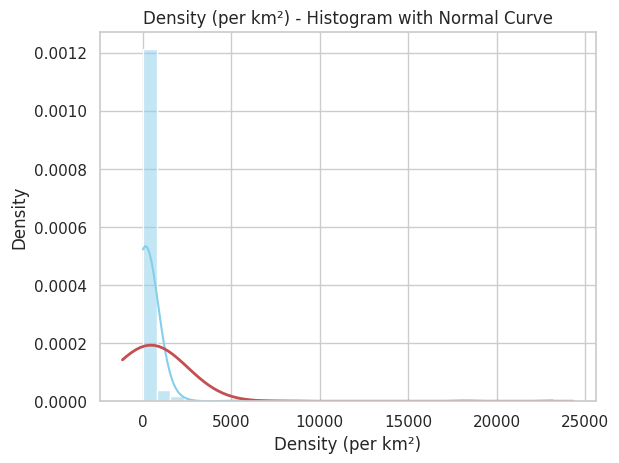

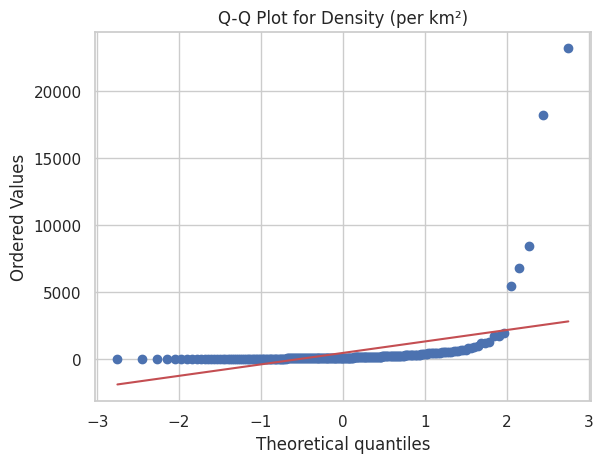

Shapiro-Wilk Test: Statistic = 0.1776, p-value = 0.0000
Kolmogorov–Smirnov Test: Statistic = 0.4134, p-value = 0.0000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Select the column
data = df['Density (per km²)'].dropna()

# Histogram + normal curve
sns.histplot(data, kde=True, stat="density", bins=30, color='skyblue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, data.mean(), data.std())
plt.plot(x, p, 'r', linewidth=2)
plt.title("Density (per km²) - Histogram with Normal Curve")
plt.show()

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Density (per km²)")
plt.show()

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

# Kolmogorov–Smirnov Test
ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
print(f"Kolmogorov–Smirnov Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")



In [ ]:
# Event A: Country is in Asia
asia_df = df[df['Continent'] == 'Asia']
P_A = len(asia_df) / len(df)

# Event B: High density (>500)
high_density_df = df[df['Density (per km²)'] > 500]
P_B = len(high_density_df) / len(df)

# P(B|A): High density among Asian countries
P_B_given_A = len(asia_df[asia_df['Density (per km²)'] > 500]) / len(asia_df)

# Bayes' Theorem: P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B
print(f"Probability(country is in Asia | high density) = {P_A_given_B:.4f}")


Probability(country is in Asia | high density) = 0.3704


Correlation Table:
Pearson: 0.4534
Spearman: 0.8491
Kendall: 0.6747

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:        2022 Population   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     60.04
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           2.89e-13
Time:                        17:35:48   Log-Likelihood:                -4688.3
No. Observations:                 234   AIC:                             9381.
Df Residuals:                     232   BIC:                             9388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

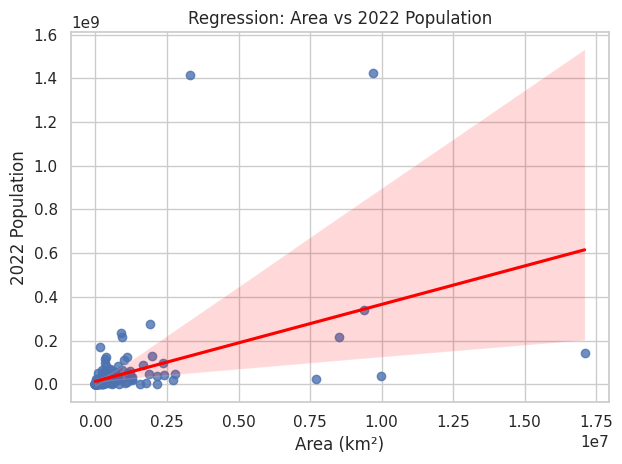

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Columns
x = df['Area (km²)']
y = df['2022 Population']

# Correlations
correlations = {
    "Pearson": x.corr(y, method='pearson'),
    "Spearman": x.corr(y, method='spearman'),
    "Kendall": x.corr(y, method='kendall')
}
print("Correlation Table:")
for method, value in correlations.items():
    print(f"{method}: {value:.4f}")

# Regression
x_const = sm.add_constant(x)  # Add intercept
model = sm.OLS(y, x_const).fit()
print("\nRegression Summary:")
print(model.summary())

# Scatter plot + regression line
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("Regression: Area vs 2022 Population")
plt.xlabel("Area (km²)")
plt.ylabel("2022 Population")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_1samp

sample = df['Density (per km²)'].dropna()
t_stat, p_val = ttest_1samp(sample, popmean=100)
print(f"One-Sample t-test: t = {t_stat:.4f}, p = {p_val:.4f}")


One-Sample t-test: t = 2.6071, p = 0.0097


In [ ]:
from statsmodels.stats.weightstats import ztest

z_stat, z_p = ztest(df['2022 Population'].dropna(), value=50000000)
print(f"Z-test: z = {z_stat:.4f}, p = {z_p:.4f}")


Z-test: z = -1.7812, p = 0.0749


In [ ]:
pop = df['2022 Population'].dropna()
area = df['Area (km²)'].dropna()

f_stat = np.var(pop, ddof=1) / np.var(area, ddof=1)
df1, df2 = len(pop)-1, len(area)-1
p_f = 1 - stats.f.cdf(f_stat, df1, df2)
print(f"F-test: F = {f_stat:.4f}, p = {p_f:.4f}")


F-test: F = 6025.9515, p = 0.0000


In [ ]:
df['High_World%'] = df['World Population Percentage'] > 1
contingency = pd.crosstab(df['Continent'], df['High_World%'])
chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency)
print(f"Chi-square Test: χ² = {chi2_stat:.4f}, p = {chi2_p:.4f}")


Chi-square Test: χ² = 13.2620, p = 0.0210


In [ ]:
groups = df[df['Continent'].isin(['Asia', 'Europe', 'Africa'])]
a1 = groups[groups['Continent'] == 'Asia']['Density (per km²)']
a2 = groups[groups['Continent'] == 'Europe']['Density (per km²)']
a3 = groups[groups['Continent'] == 'Africa']['Density (per km²)']

f_stat_anova, p_val_anova = stats.f_oneway(a1, a2, a3)
print(f"ANOVA: F = {f_stat_anova:.4f}, p = {p_val_anova:.4f}")


ANOVA: F = 1.7683, p = 0.1741


In [ ]:
# Summary Table
summary_table = pd.DataFrame({
    "Test": ["t-test", "Z-test", "F-test", "Chi-square", "ANOVA"],
    "Statistic": [t_stat, z_stat, f_stat, chi2_stat, f_stat_anova],
    "p-value": [t_p, z_p, p_f, chi2_p, p_val_anova]
}).round(4)

print(summary_table)


         Test  Statistic  p-value
0      t-test     2.6071   0.0097
1      Z-test    -1.7812   0.0749
2      F-test  6025.9515   0.0000
3  Chi-square    13.2620   0.0210
4       ANOVA     1.7683   0.1741
